### Classification of MNIST using TensorFlow v2

The objective of W2 is to Build a neural network machine learning model that classifies images, train the Neural Network and evaluate the accuracy of the model.

- https://www.tensorflow.org/guide/keras
- https://www.kaggle.com/datasets/hojjatk/mnist-dataset/data/code
- https://www.kaggle.com/code/hojjatk/read-mnist-dataset
- https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/cifar10_tutorial.ipynb

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Sequential

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2026-01-26 20:35:05.239896: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [2]:
# Load and preprocess the MNIST dataset

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
# A simple feed-forward neural network (ANN) baseline for MNIST
# Note: This model treats each image as a flat vector (28x28 = 784 features).

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/home/dev-algo/anaconda3/envs/WLV-AI/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1769478667.349039   32351 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3474 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

The final layer uses a **softmax** activation to turn the network outputs into a probability distribution over the 10 classes.
During training, the loss function compares these predicted probabilities with the true labels and updates the weights to improve accuracy.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [6]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()

In [7]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

#### Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2026-01-26 20:54:37.428200: I external/local_xla/xla/service/service.cc:163] XLA service 0x79a2d80097c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-26 20:54:37.428218: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2026-01-26 20:54:37.514518: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-26 20:54:37.881214: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700


  20/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2471 - loss: 2.0994 

I0000 00:00:1769478879.350165   32894 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9285 - loss: 0.2438
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9686 - loss: 0.1014
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9779 - loss: 0.0709
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9831 - loss: 0.0538
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9861 - loss: 0.0422


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [9]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 3s - 10ms/step - accuracy: 0.9764 - loss: 0.0823


[0.0823352113366127, 0.9764000177383423]

In [10]:
# Predict class probabilities for the test set
y_pred = model.predict(x_test, verbose=0)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

y_pred_labels[:10], y_true_labels[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]), array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

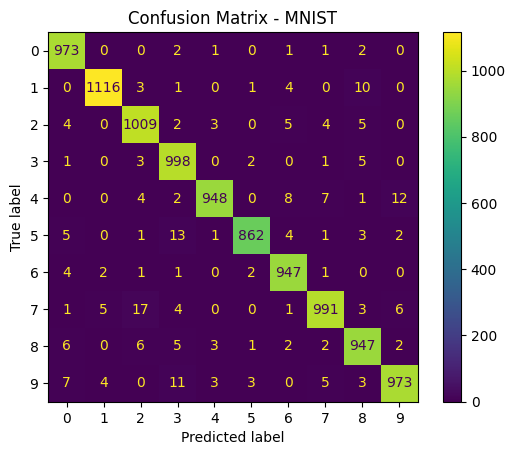

In [11]:
# Confusion matrix for MNIST
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - MNIST')
plt.show()

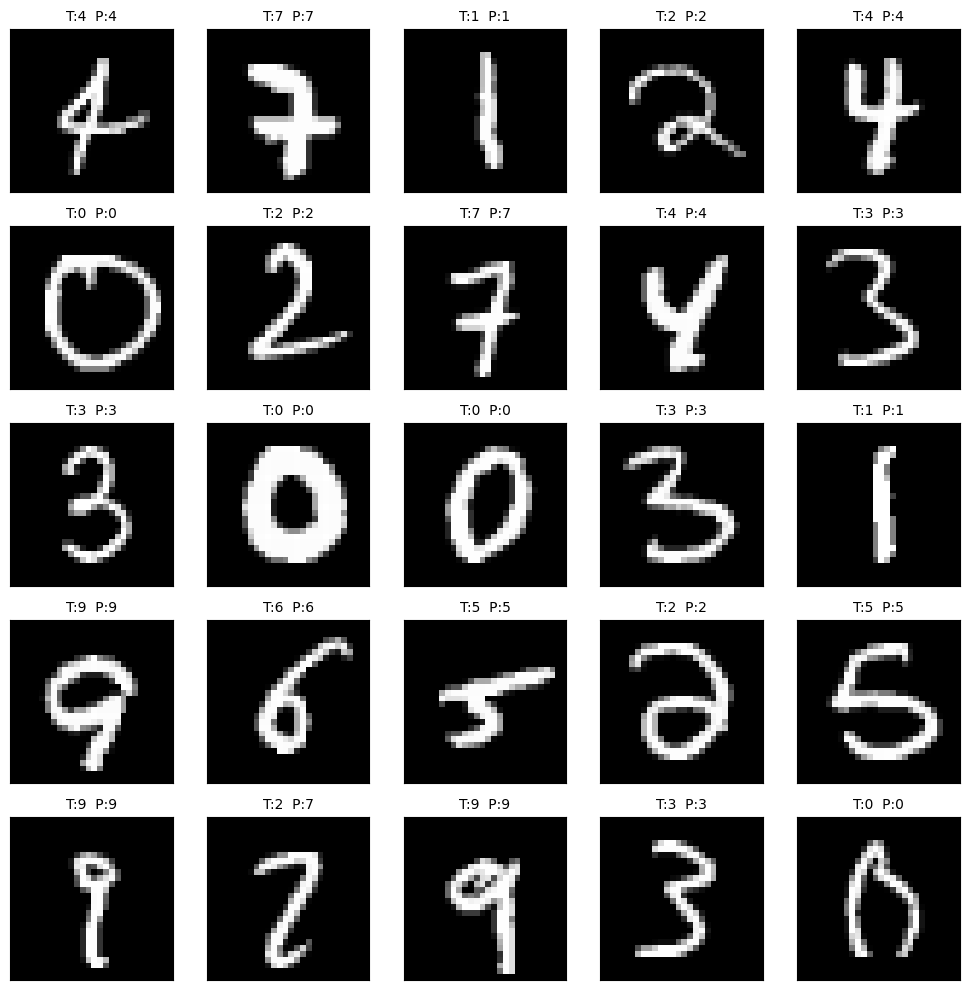

In [12]:
# Visualise a few MNIST predictions
start_index = 300
num_row, num_col = 5, 5

fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))
for i in range(num_row * num_col):
    ax = axes[i // num_col, i % num_col]
    img = x_test[start_index + i]
    ax.imshow(img, cmap='gray')
    t = y_true_labels[start_index + i]
    p = y_pred_labels[start_index + i]
    ax.set_title(f"T:{t}  P:{p}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

The model above typically reaches high accuracy on MNIST with only a simple feed-forward network.
MNIST is a relatively clean, centred, greyscale dataset, so even a basic ANN can learn useful decision boundaries.

Next, we will try the same *dense-layer* approach on **CIFAR-10**, which is a harder, colour image dataset with far more visual variation.

- https://www.kaggle.com/c/cifar-10

### CIFAR-10 Classification using Dense Layers

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load CIFAR-10 dataset (32x32 RGB images, 10 classes)
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()

# Normalise pixel values to [0, 1]
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar  = x_test_cifar.astype('float32') / 255.0

# Dense networks expect 1D vectors, so we flatten 32x32x3 -> 3072
x_train_cifar_flat = x_train_cifar.reshape(x_train_cifar.shape[0], -1)
x_test_cifar_flat  = x_test_cifar.reshape(x_test_cifar.shape[0], -1)

# One-hot encode labels
y_train_cifar_oh = tf.keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar_oh  = tf.keras.utils.to_categorical(y_test_cifar, 10)

# Define a dense (ANN/MLP) baseline model for CIFAR-10
cifar_model = models.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cifar_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cifar_model.summary()

# Train (keep epochs modest so this runs quickly on most machines)
history = cifar_model.fit(
    x_train_cifar_flat, y_train_cifar_oh,
    epochs=5,
    batch_size=64,
    validation_data=(x_test_cifar_flat, y_test_cifar_oh),
    verbose=1
)

# Evaluate
test_loss, test_acc = cifar_model.evaluate(x_test_cifar_flat, y_test_cifar_oh, verbose=0)
print(f"CIFAR-10 Dense Baseline Test Accuracy: {test_acc:.4f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

2026-01-26 21:02:58.321687: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.
2026-01-26 21:02:59.565995: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.3249 - loss: 1.8684 - val_accuracy: 0.3812 - val_loss: 1.7425
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3991 - loss: 1.6751 - val_accuracy: 0.4206 - val_loss: 1.6134
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4342 - loss: 1.5852 - val_accuracy: 0.4415 - val_loss: 1.5860
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4536 - loss: 1.5307 - val_accuracy: 0.4625 - val_loss: 1.5217
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4694 - loss: 1.4837 - val_accuracy: 0.4580 - val_loss: 1.5334
CIFAR-10 Dense Baseline Test Accuracy: 0.4580


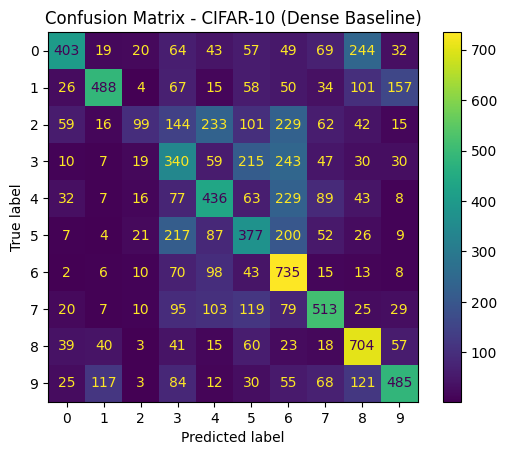

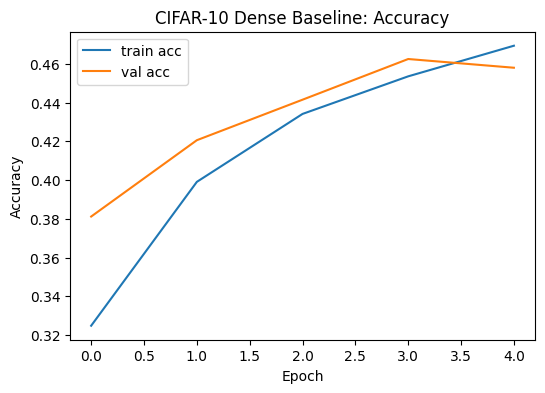

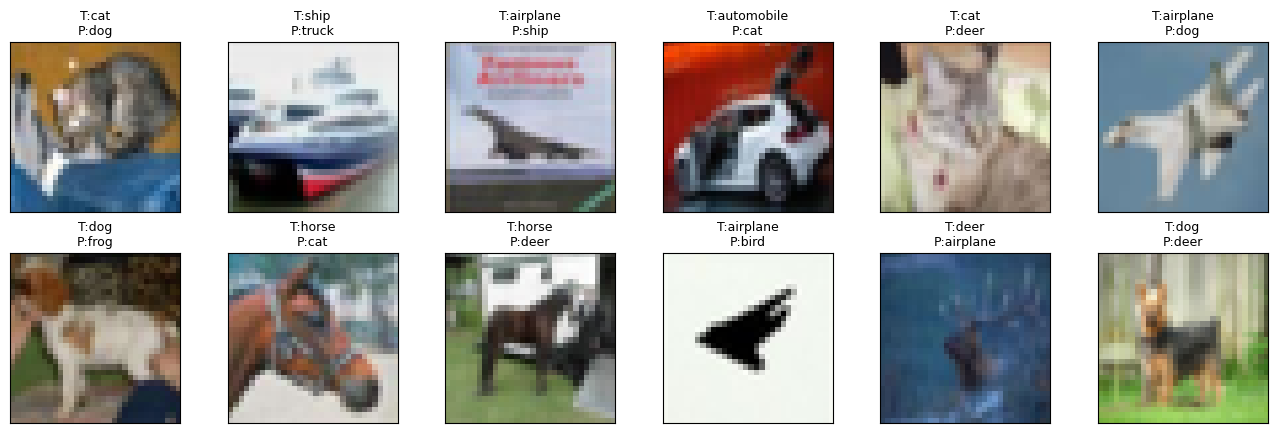

In [14]:
# Predict CIFAR-10 test set
y_pred_cifar = cifar_model.predict(x_test_cifar_flat, verbose=0)
y_pred_cifar_labels = np.argmax(y_pred_cifar, axis=1)
y_true_cifar_labels = y_test_cifar.reshape(-1)

# Confusion matrix
cm = confusion_matrix(y_true_cifar_labels, y_pred_cifar_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - CIFAR-10 (Dense Baseline)')
plt.show()

# Plot training curves
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CIFAR-10 Dense Baseline: Accuracy')
plt.legend()
plt.show()

# Show a few misclassified examples (if any)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
mis_idx = np.where(y_pred_cifar_labels != y_true_cifar_labels)[0]

if len(mis_idx) > 0:
    n = 12
    sel = mis_idx[:n]
    cols = 6
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(2.2*cols, 2.2*rows))
    axes = np.array(axes).reshape(-1)
    for j, ax in enumerate(axes):
        if j >= n:
            ax.axis('off')
            continue
        i = sel[j]
        ax.imshow(x_test_cifar[i])
        t = class_names[int(y_true_cifar_labels[i])]
        p = class_names[int(y_pred_cifar_labels[i])]
        ax.set_title(f"T:{t}\nP:{p}", fontsize=9)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()
else:
    print("No misclassifications found (unexpected).")

### Why CIFAR-10 is harder (and why CNNs help)

A dense network can work well on MNIST because the images are simple, greyscale, and fairly standardised.
CIFAR-10 is different: it contains small colour images with clutter, background variation, and objects that can appear in many positions and orientations.

When we **flatten** an image into a long vector, the model loses the *spatial structure* (neighbouring pixels, edges, textures, and shapes).
This is why a dense-only approach often plateaus at a much lower accuracy on CIFAR-10 than it does on MNIST.

In **Week 4**, we will move to **Convolutional Neural Networks (CNNs)**, which are designed to exploit spatial patterns using:
- **convolutional filters** (local feature detectors),
- **parameter sharing** (fewer parameters than fully-connected layers),
- and often **pooling/striding** (some translational robustness).

The key takeaway: **for image tasks beyond simple datasets, we typically need more specialised architectures than a basic ANN.**